In [1]:
import numpy as np
import scipy.io as sio
from lib import view, traj_view
import matplotlib.pyplot as plt

# Can this framework be useful in materials science ? 
## Let's apply this to molecules.
## Import data / read a dictionary


In [2]:
def read_xsf_file(file):
    with open(file, 'r') as f:
        lines=f.readlines()
    mols=[]
    idx=0
    while idx<len(lines):
        mol={'species':[], 'positions':[],'cell':[[0.0,0.0,0.0],[0.0,0.0,0.0],[0.0,0.0,0.0]]}
        nat=int(lines[idx])
        toread=range(idx+2, idx+2+nat)
        for i in toread:
            data=lines[i].split()
            mol['species'].append(data[0])
            mol['positions'].append([float(x) for x in data[1:]])
        mols.append(mol)
        idx=idx+2+nat
    return mols

In [3]:
#import a dataset
! head -1 Qm7b.dat
print("    ")
properties = np.loadtxt('./Qm7b.dat',skiprows=1)
molecules = read_xsf_file('qm7b-ase.xyz')
print(properties[0])

CV1 CV2 aepbe0 electron_affinity polarizability_pbe C O N S Cl H
    
[ -3.81473000e-01  -6.24022000e-01  -4.20933750e+02  -3.98613000e+00
   2.53457600e+00   1.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   4.00000000e+00]


In [4]:
##Task number one : Students try to read the xyz file in their possession,here for simplicity parsed in ase
## as a first exercise, they will place the coordinates in position, species in sp and assemble them in a 
## simple dictionary entry called molecule, with two attributes : "pos" and "sp"
mol = molecules[150]
view(mol)

A Jupyter Widget

A Jupyter Widget

# Explore and manipulate data
### In this part they will try viewing the molecules, see on what they differ, and try to visualise numerically how the property of interest oscillates (atomization energy)

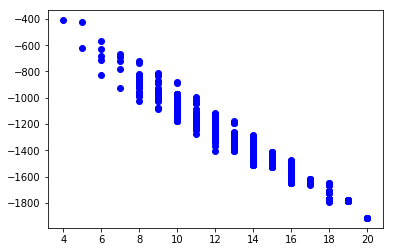

In [5]:
submols=molecules[:1000]
subproperties=properties[:1000]
nat=[len(mol['species']) for mol in submols]
totE=subproperties[:,2]
plt.scatter(nat,totE, c='blue')
plt.show()

In [ ]:
submols=molecules[:1000]
subproperties=properties[:1000]
nat=[len(mol['species']) for mol in submols]
totE=subproperties[:,2]
plt.scatter(nat,totE, c='blue')
plt.show()

In [45]:
### Build a description for our molecules : First round --> atomic positions
### First problem : not all of same lengths --> solution: pad them with zeros!

feats = [molecules[i].positions.flatten() for i in range(len(molecules))]
ll = 0
for i in feats:
    if len(i)>ll :
        ll = len(i)*3

feats = np.zeros((len(molecules),ll))
for i in range(len(molecules)):
    feats[i,0:len(molecules[i].positions)*3] = molecules[i].positions.flatten()
    

    
    
X = feats
y = properties[:,2]
#print y.shape,X.shape

In a linear regression formulation, we assume that our predicted property and the elements in our set are related
by a linear relation.
Meaning that, ideally, all our points would lay on a line, with any other new structure having a property simply found
as a linear interpolation of the known ones.
In simple math : 

\begin{align}
    y_{i}\,=\,x_i^t\beta + x^0_i
\end{align}

Then, discussion on training set and test set.

In [46]:
## Trying to distinguish how similar two structures are on the basis of their atomic positions
## Check how linear regression performs, using only one feature, or more 
## The student will become familiar with MAE, RMSE error measures, and try to understand how to improve it

import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score



# Use only one feature
db_X = np.sum(X,axis=1).reshape(-1,1)
# Using more features 
db_X = X



# Split the data into training/testing sets
db_X_train = db_X[:-2000]
db_X_test = db_X[-2000:]
#print db_X_train.shape,db_X_test.shape

# Split the targets into training/testing sets
db_y_train = y[:-2000]
db_y_test = y[-2000:]
#print db_y_train.shape,db_y_test.shape


# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(db_X_train, db_y_train)

# Make predictions using the testing set
db_y_pred = regr.predict(db_X_test)

# The coefficients
#print('Coefficients: ', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(db_y_test, db_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(db_y_test, db_y_pred))


if len(db_X[0])==1:
    # Plot outputs
    print(db_X_test.shape, db_y_test.shape)
    plt.scatter(db_X_test, db_y_test,  color='black')
    plt.plot(db_X_test, db_y_pred, color='blue', linewidth=3)

    plt.xticks(())
    plt.yticks(())

    plt.show()

Mean squared error: 9246.70
Variance score: 0.69


In [ ]:
##The student plays with the ratio of the training / test set and see how it affects the error outcome

In [ ]:
## the students grasps the limit of our description, we suggest them to think of others,
## based on simple geometrical ideas 

def new_descriptor_geometrical_1(molecule):
    return value
def new_descriptor_geometrical_2(molecule):
    return value
def new_descriptor_geometrical_3(molecule):
    return value
def new_descriptor_geometrical_4(molecule):
    return value

In [ ]:
## Test them again by wrapping the previous linear regression model in a single function to do it quick!

def linreg(X,y,trainpct):
    
    
    return

In [ ]:
##Offering SMIfp fingerprint : they work well and show how well 
## First the student is told how they work and they try to implement them

def SMIfp(mol):
    
    
    return x

In [20]:
## Once the students have access to this new descriptor, they test it with linreg and see
## that it outperforms whatever they had used before (or maybe not, if they guessed amazing geometrical descr.)
## Now we tell them that they can combine various descriptors to reduce the error on training, but is it 
## always the more the better? 

## Introduce a ridge regression formulation

Object `pybel.pybel` not found.
